Loading and understanding the Data structure

In [4]:
#import library and load the dataset
import pandas as pd

file_path = r"C:\Users\User\Documents\My Documents\CW2 Group\online_retail.csv"

df = pd.read_csv(file_path)
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
#Check no.of rows and colunms
df.shape

(541909, 9)

In [6]:
#Check the data types
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Handling Missing Values, Duplicates, negative values and data types

In [7]:
#check missing values
df.isna().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#replace the missing value with the Unknown but can create issues in the analysis of customer segmentation
#df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [9]:
#Drop the customerID with missing values 
df = df.dropna(subset=['CustomerID'])


In [10]:
#Fill missing description with unknown
df['Description'] = df['Description'].fillna('Unknown')


In [11]:
#Ensure no missing values are available in the dataset
print(df.isnull().sum())  


index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [12]:
#Check duplicated rows
df.duplicated().sum()


0

In [13]:
# Remove negative values in quantity and prices colunm since those values cannot be negative 
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [14]:
# Convert InvoiceNo and StockCode to string 
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)

# Convert InvoiceDate to datetime format if we need to do time based analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert CustomerID to string 
df['CustomerID'] = df['CustomerID'].astype(str)

# Convert Country to categorical type 
df['Country'] = df['Country'].astype('category')

df.dtypes


index                   int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country              category
dtype: object

# Feature Engineering for analysis

In [15]:
# 01Create TotalPrice to get the revenue per transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
#02Create additional columns by categorizing the Date for the analysis of seasonal trends

# categorize date components into year, month, day, weekday,working hour and weekend
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.weekday  # Monday = 0, Sunday = 6
df['Hour'] = df['InvoiceDate'].dt.hour

# Create a feature for working hours 
df['IsWorkingHour'] = df['Hour'].apply(lambda x: 1 if 9 <= x <= 18 else 0)

# Check if the purchase was made on a weekend
df['IsWeekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

#Display created columns
print(df[['Year', 'Month', 'Day', 'Weekday', 'Hour', 'IsWeekend']].head())

   Year  Month  Day  Weekday  Hour  IsWeekend
0  2010     12    1        2     8          0
1  2010     12    1        2     8          0
2  2010     12    1        2     8          0
3  2010     12    1        2     8          0
4  2010     12    1        2     8          0


In [17]:
#03Customer recency
import datetime
latest_date = df['InvoiceDate'].max()  # Get last transaction date
df['Recency'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: (latest_date - x.max()).days)

#print 5 rows of customer recency by ensuring one row per customerID
print(df[['CustomerID', 'InvoiceDate', 'Recency']].drop_duplicates(subset=['CustomerID']).head(5))

#print a random customer's recency
print(df[['CustomerID', 'Recency']].drop_duplicates().sample(5))


   CustomerID         InvoiceDate  Recency
0     17850.0 2010-12-01 08:26:00      371
9     13047.0 2010-12-01 08:34:00       31
26    12583.0 2010-12-01 08:45:00        2
46    13748.0 2010-12-01 09:00:00       95
65    15100.0 2010-12-01 09:09:00      333
       CustomerID  Recency
301672    16902.0      115
122500    18210.0        1
225024    13080.0      178
526846    18015.0        3
200125    15292.0      200


In [18]:
#04Create customer-based aggregations to find the total spend, total number of purchases and average order value per customer
#High value customers can be targeted for loyalty program

# Total spend per customer
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Total number of purchases per customer
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Average order value per customer
customer_avg_order = df.groupby('CustomerID')['TotalPrice'].mean().reset_index()

print(customer_spending.head())
print(customer_frequency.head())
print(customer_avg_order.head())

  CustomerID  TotalPrice
0    12346.0    77183.60
1    12347.0     4310.00
2    12348.0     1797.24
3    12349.0     1757.55
4    12350.0      334.40
  CustomerID  InvoiceNo
0    12346.0          1
1    12347.0          7
2    12348.0          4
3    12349.0          1
4    12350.0          1
  CustomerID    TotalPrice
0    12346.0  77183.600000
1    12347.0     23.681319
2    12348.0     57.975484
3    12349.0     24.076027
4    12350.0     19.670588


In [19]:
#05Find the popular product based on the purchase quantity grouping by description

# Aggregate total quantity sold per product (grouping by Description)
popular_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort by most sold products
popular_products = popular_products.sort_values(by='Quantity', ascending=False)

# Add a flag for popular products (Top 100)
df['IsPopularProduct'] = df['Description'].apply(lambda x: 1 if x in popular_products['Description'][:100].values else 0)

# Display top products
print(popular_products.head(10))

                             Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
1762             JUMBO BAG RED RETROSPOT     46181
3698  WHITE HANGING HEART T-LIGHT HOLDER     36725
216        ASSORTED COLOUR BIRD ORNAMENT     35362
2269     PACK OF 72 RETROSPOT CAKE CASES     33693
2600                      POPCORN HOLDER     30931
2656                  RABBIT NIGHT LIGHT     27202
2047             MINI PAINT SET VINTAGE      26076


# Exploratory Data Analysis

In [20]:
#get summary statistics of dataset
df.describe()

,index,Quantity,InvoiceDate,UnitPrice,TotalPrice,Year,Month,Day,Weekday,Hour,IsWorkingHour,IsWeekend,Recency,IsPopularProduct
count,397884.000000,397884.000000,397884,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,278462.993893,12.988238,2011-07-10 23:41:23.511023360,3.116488,22.397000,2010.934260,7.612475,15.042186,2.614546,12.728202,0.966842,0.157767,40.125680,0.154671
min,0.000000,1.000000,2010-12-01 08:26:00,0.001000,0.001000,2010.000000,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,148333.750000,2.000000,2011-04-07 11:12:00,1.250000,4.680000,2011.000000,5.000000,7.000000,1.000000,11.000000,1.000000,0.000000,3.000000,0.000000
50%,284902.500000,6.000000,2011-07-31 14:39:00,1.950000,11.800000,2011.000000,8.000000,15.000000,2.000000,13.000000,1.000000,0.000000,15.000000,0.000000
75%,410074.250000,12.000000,2011-10-20 14:33:00,3.750000,19.800000,2011.000000,11.000000,22.000000,4.000000,14.000000,1.000000,0.000000,42.000000,0.000000
max,541908.000000,80995.000000,2011-12-09 12:50:00,8142.750000,168469.600000,2011.000000,12.000000,31.000000,6.000000,20.000000,1.000000,1.000000,373.000000,1.000000
std,152770.852038,179.331775,NaN,22.097877,309.071041,0.247828,3.416520,8.653746,1.928310,2.273519,0.179049,0.364523,65.471933,0.361591


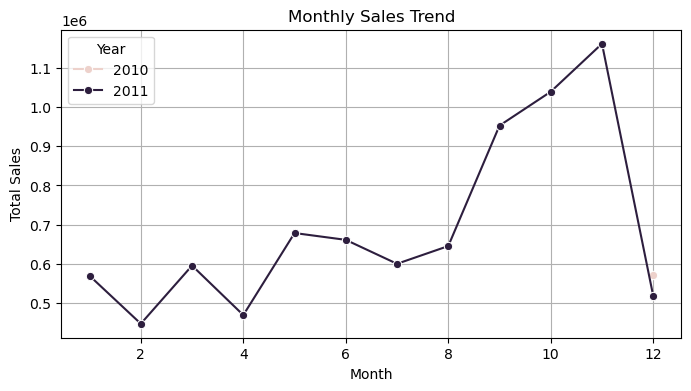

In [21]:
#Monthly sales analysis where can identify  better marketing strategies according to the peak sales months

import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_sales, x='Month', y='TotalPrice', hue='Year', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22104\126377677.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Description', data=top_10_products, palette='viridis')


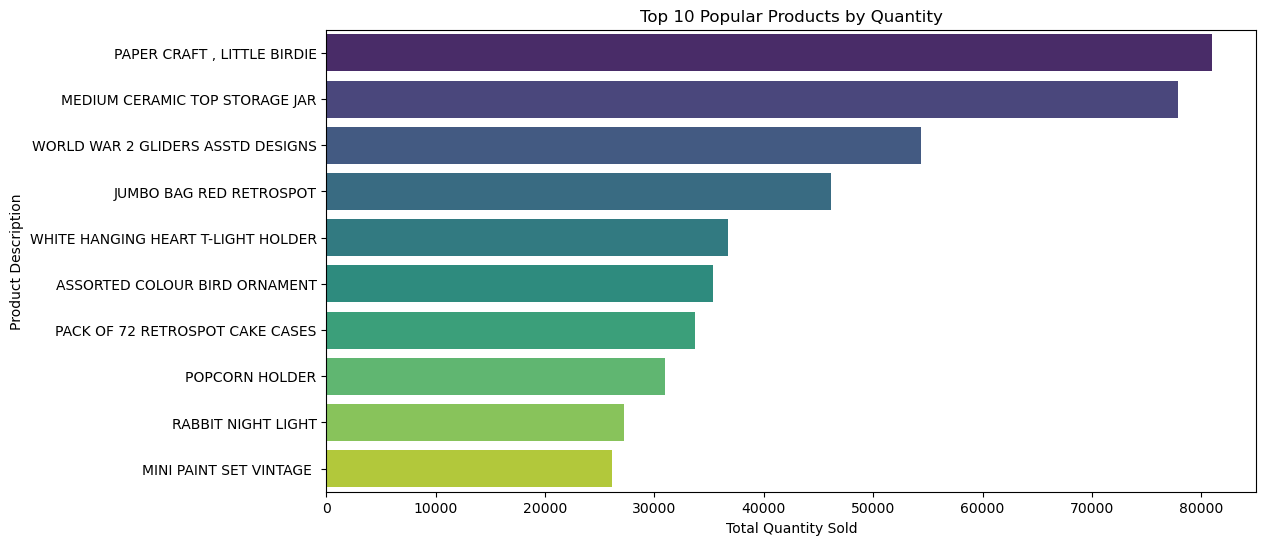

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total quantity sold per product
popular_products = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort by highest quantity and take the top 10
top_10_products = popular_products.sort_values(by='Quantity', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_10_products, palette='viridis')

# Add labels and title
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Popular Products by Quantity')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22104\2869446427.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))


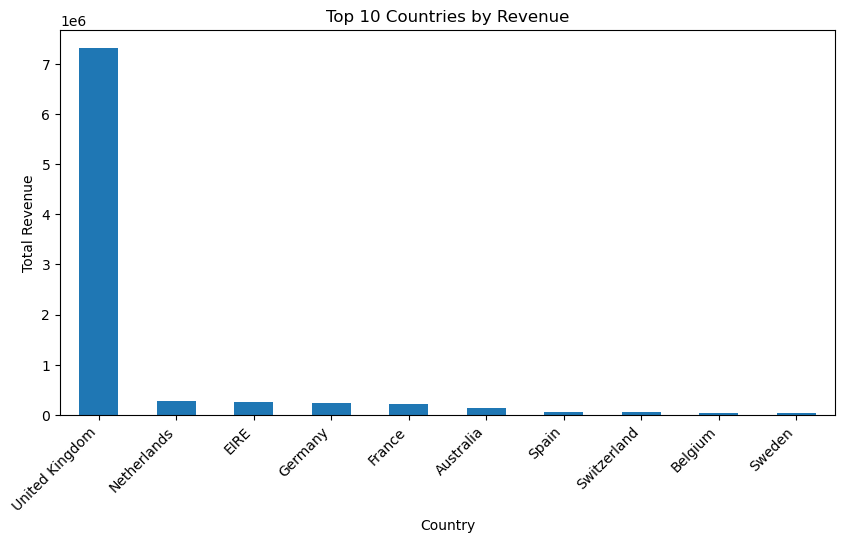

In [23]:
# Create a Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Top 10 Countries by Revenue
top_countries = (df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10))

plt.figure(figsize=(10, 5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22104\4192456523.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="InvoiceNo", y="Revenue", data=top_invoices, palette="Blues_r")


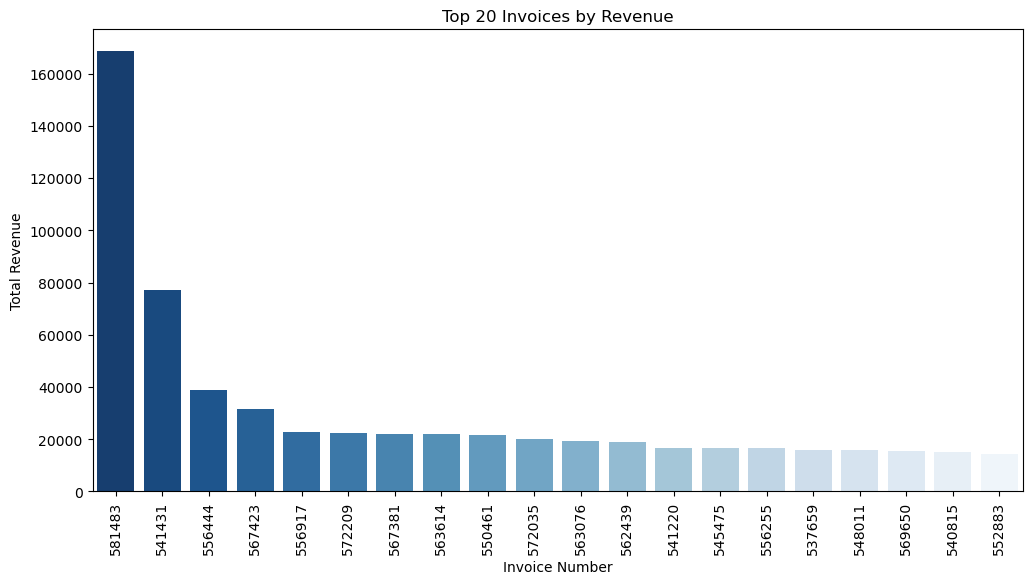

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

total_revenue_per_invoice = df.groupby('InvoiceNo')['Revenue'].sum().reset_index()

# Getting top 20 invoices by revenue
top_invoices = total_revenue_per_invoice.sort_values(by="Revenue", ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x="InvoiceNo", y="Revenue", data=top_invoices, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 20 Invoices by Revenue")
plt.xlabel("Invoice Number")
plt.ylabel("Total Revenue")
plt.show()
